In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [249]:
data_train = pd.read_excel('/Users/skylark/Desktop/train.xlsx')

In [254]:
data_train.fillna(0, inplace=True)

In [255]:
data_test.fillna(0, inplace=True)

In [250]:
data_test = pd.read_excel('/Users/skylark/Desktop/test.xlsx')

In [256]:
cat_columns = ['Length_Employed', 'Home_Owner', 'Income_Verified', 'Purpose_Of_Loan', 'Gender']

In [257]:
new_data_train = pd.get_dummies(data_train, columns=cat_columns, drop_first=True)
new_data_train.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate,Length_Employed_1 year,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10000001,7000,68000.0,18.37,0,0.0,9,14,1,0,...,0,0,0,0,0,0,0,0,0,0
1,10000002,30000,0.0,14.93,0,17.0,12,24,3,0,...,0,0,0,0,0,0,0,0,0,0
2,10000003,24725,75566.4,15.88,0,0.0,12,16,3,0,...,0,0,0,0,0,0,0,0,0,1
3,10000004,16000,56160.0,14.34,3,0.0,16,22,3,0,...,0,0,0,0,0,0,0,0,0,1
4,10000005,17000,96000.0,22.17,1,0.0,19,30,1,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
new_data_test = pd.get_dummies(data_test, columns=cat_columns, drop_first=True)
new_data_test.head()

,Loan_ID,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,10164310,27500,129000.0,12.87,0,68.0,10,37,0,1,...,0,0,0,0,0,0,0,0,0,1
1,10164311,26000,110000.0,11.37,0,0.0,6,23,0,1,...,0,0,0,0,0,0,0,0,0,1
2,10164312,6075,75000.0,6.83,2,0.0,5,20,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10164313,12000,73000.0,7.76,0,0.0,6,8,0,1,...,0,0,0,0,0,0,0,0,0,1
4,10164314,35000,156000.0,9.62,0,26.0,9,21,0,0,...,0,0,0,0,0,0,0,0,0,1


In [286]:
x_nn = new_data_train.fillna(0)
len(x_nn.columns)

41

In [260]:
x_nn_test = new_data_test.fillna(0)

In [261]:
x_nn = x_nn.drop(['Loan_ID','Interest_Rate'], axis=1)
x_nn.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,7000,68000.0,18.37,0,0.0,9,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,0.0,14.93,0,17.0,12,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24725,75566.4,15.88,0,0.0,12,16,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,16000,56160.0,14.34,3,0.0,16,22,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17000,96000.0,22.17,1,0.0,19,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
x_nn_test = x_nn_test.drop(['Loan_ID'], axis=1)
x_nn_test.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,27500,129000.0,12.87,0,68.0,10,37,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,26000,110000.0,11.37,0,0.0,6,23,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,6075,75000.0,6.83,2,0.0,5,20,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,12000,73000.0,7.76,0,0.0,6,8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,35000,156000.0,9.62,0,26.0,9,21,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [287]:
len(x_nn_test.columns)

39

In [264]:
y = new_data_train.iloc[:,8:9]
y = pd.get_dummies(y, columns=['Interest_Rate'])
y.head()

,Interest_Rate_1,Interest_Rate_2,Interest_Rate_3
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [265]:
def normalise(data):
    return np.round((data-data.mean())/data.std(),2)

In [266]:
x_nn[['Loan_Amount_Requested','Annual_Income', 'Debt_To_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']] = normalise(x_nn[['Loan_Amount_Requested','Annual_Income', 'Debt_To_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']])
x_nn.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,-0.89,0.10,0.15,0,-0.70,-0.44,-0.96,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.89,-1.01,-0.29,0,0.05,0.16,-0.09,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.25,0.22,-0.17,0,-0.70,0.16,-0.78,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.20,-0.10,-0.37,3,-0.70,0.96,-0.26,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.32,0.55,0.63,1,-0.70,1.56,0.43,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
x_nn_test[['Loan_Amount_Requested','Annual_Income', 'Debt_To_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']] = normalise(x_nn_test[['Loan_Amount_Requested','Annual_Income', 'Debt_To_Income', 'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts']])
x_nn_test.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Length_Employed_1 year,Length_Employed_10+ years,Length_Employed_2 years,...,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Male
0,1.58,1.16,-0.56,0,2.33,-0.24,1.03,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1.40,0.83,-0.75,0,-0.70,-1.05,-0.18,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,-1.00,0.22,-1.33,2,-0.70,-1.25,-0.44,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.28,0.19,-1.21,0,-0.70,-1.05,-1.47,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2.49,1.63,-0.97,0,0.46,-0.44,-0.35,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [268]:
from tensorflow import keras

In [269]:
from keras import layers
from keras import models

In [270]:
from sklearn.model_selection import train_test_split

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x_nn.values, y.values, test_size = 0.2, random_state=200)

In [302]:
x_train.shape

(131447, 41)

In [303]:
int(len(x_train)*0.3)

39434

In [327]:
model = models.Sequential()

In [328]:
model.add(layers.Dense(4, activation='relu', input_shape=(41,)))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [329]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [330]:
x_val = x_train[:40000]
y_val = y_train[:40000]

In [331]:
partial_x_train = x_train[40000:]
partial_y_train = y_train[40000:]

In [332]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size=512, validation_data=(x_val, y_val))

Train on 91447 samples, validate on 40000 samples
Epoch 1/20
91447/91447 [==============================] - 2s 25us/step - loss: 23381.2506 - accuracy: 0.3593 - val_loss: 1408.0744 - val_accuracy: 0.3662
Epoch 2/20
91447/91447 [==============================] - 2s 24us/step - loss: 210.3340 - accuracy: 0.3895 - val_loss: 1.1448 - val_accuracy: 0.4264
Epoch 3/20
91447/91447 [==============================] - 2s 22us/step - loss: 7.4805 - accuracy: 0.4283 - val_loss: 1.0726 - val_accuracy: 0.4264
Epoch 4/20
91447/91447 [==============================] - 2s 25us/step - loss: 2.6111 - accuracy: 0.4296 - val_loss: 1.0577 - val_accuracy: 0.4264
Epoch 5/20
91447/91447 [==============================] - 2s 22us/step - loss: 1.0553 - accuracy: 0.4312 - val_loss: 1.0576 - val_accuracy: 0.4264
Epoch 6/20
91447/91447 [==============================] - 2s 25us/step - loss: 1.0552 - accuracy: 0.4312 - val_loss: 1.0581 - val_accuracy: 0.4264
Epoch 7/20
91447/91447 [==============================] - 2

In [311]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [312]:
val_loss = history.history['val_loss']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
acc = history.history['accuracy']

In [313]:
range(1, len(loss)+1)

range(1, 21)

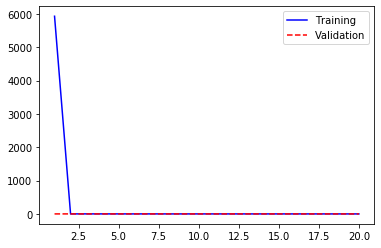

In [314]:
plt.plot(range(1, len(loss)+1), loss, 'b', label = 'Training')
plt.plot(range(1, len(loss)+1), val_loss, 'r--', label = 'Validation')
plt.legend()
plt.show()

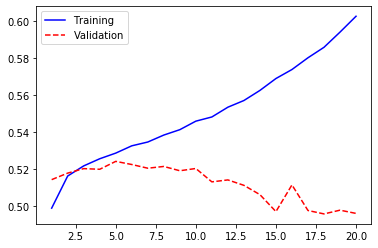

In [298]:
plt.plot(range(1, len(loss)+1), acc, 'b', label = 'Training')
plt.plot(range(1, len(loss)+1), val_acc, 'r--', label = 'Validation')
plt.legend()
plt.show()

In [299]:
model.fit(partial_x_train, partial_y_train, epochs = 5, batch_size=512, validation_data=(x_val, y_val))

Train on 91447 samples, validate on 40000 samples
Epoch 1/5
91447/91447 [==============================] - 14s 150us/step - loss: 0.8219 - accuracy: 0.6091 - val_loss: 1.0638 - val_accuracy: 0.4788
Epoch 2/5
91447/91447 [==============================] - 13s 139us/step - loss: 0.8068 - accuracy: 0.6181 - val_loss: 1.0943 - val_accuracy: 0.4866
Epoch 3/5
91447/91447 [==============================] - 12s 129us/step - loss: 0.7952 - accuracy: 0.6268 - val_loss: 1.1292 - val_accuracy: 0.4806
Epoch 4/5
91447/91447 [==============================] - 15s 161us/step - loss: 0.7793 - accuracy: 0.6341 - val_loss: 1.2637 - val_accuracy: 0.4762
Epoch 5/5
91447/91447 [==============================] - 14s 151us/step - loss: 0.7671 - accuracy: 0.6407 - val_loss: 1.1646 - val_accuracy: 0.4784


In [300]:
model.evaluate(x_test, y_test)

32862/32862 [==============================] - 5s 140us/step


[1.158964022572336, 0.4779684841632843]

In [195]:
pred = model.predict(x_test)

In [162]:
pred[0,np.argmax(pred[0])]

0.54908735

In [196]:
final_res = np.zeros(pred.shape)
final_res.shape

(32862, 3)

In [197]:
for i in range(len(x_test)):
    final_res[i, np.argmax(pred[i])] = 1

In [165]:
def final(data):
    int_r = []
    for i in range(len(data)):
        if data[i][0]==1:
            int_r.append(2)
        elif data[i][0]==0:
            if data[i][1]==0:
                int_r.append(1)
            else:
                int_r.append(3)
    return int_r            

In [199]:
results = pd.DataFrame({'actual_int_rate': final(y_test), 'predicted_int_rate': final(final_res)})

In [200]:
results['test'] = results.apply(lambda x: 1 if x.actual_int_rate==x.predicted_int_rate else 0, axis=1)
results.head()

,actual_int_rate,predicted_int_rate,test
0,2,2,1
1,3,1,0
2,1,3,0
3,3,2,0
4,3,3,1


In [201]:
from sklearn.metrics import classification_report, confusion_matrix

In [202]:
print(classification_report(results.actual_int_rate, results.predicted_int_rate))

              precision    recall  f1-score   support

           1       0.55      0.59      0.57     12075
           2       0.43      0.35      0.39      6593
           3       0.50      0.51      0.50     14194

    accuracy                           0.51     32862
   macro avg       0.49      0.48      0.49     32862
weighted avg       0.50      0.51      0.50     32862



In [169]:
test_pred = model.predict(x_nn_test.values)

In [170]:
test_res = np.zeros(test_pred.shape)
test_res.shape

for i in range(len(x_nn_test)):
    test_res[i, np.argmax(test_pred[i])] = 1

In [175]:
test_result = pd.DataFrame({'Loan_ID': data_test.Loan_ID, 'Interest_Rate': final(test_res[:,1:3])})
test_result.set_index('Loan_ID', inplace=True)

In [176]:
test_result

,Interest_Rate
Loan_ID,
10164310,2
10164311,1
10164312,2
10164313,2
10164314,3
...,...
10273846,3
10273847,2
10273848,2


In [177]:
test_result.to_csv('/Users/skylark/Desktop/hackathon/new_res2.csv')

In [135]:
res=pd.read_csv('/Users/skylark/Desktop/hackathon/new_res.csv')

In [139]:
res.drop('Unnamed: 0',axis=1, inplace=True)

In [142]:
res.set_index('Loan_ID', inplace=True)

In [144]:
res.to_csv('/Users/skylark/Desktop/new_res.csv')

In [172]:
res

,Interest_Rate
Loan_ID,
10164310,2
10164311,1
10164312,3
10164313,2
10164314,3
...,...
10273846,3
10273847,1
10273848,2


In [305]:
x_train

array([[1.0080129e+07, 8.0000000e+03, 5.0000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0002041e+07, 5.0000000e+03, 3.0247000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0107354e+07, 6.2000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [1.0107341e+07, 2.9000000e+04, 1.0100000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0012906e+07, 1.6000000e+04, 9.9000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0001819e+07, 6.0000000e+03, 3.5000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])